# This Notebook displays Step 2: Unit Conversion and Creation of the Recharge File in FloPy

In [7]:
import flopy
import numpy as np
import os
import matplotlib.pyplot as plt

## Convert Units to feet per year

In [8]:
recharge = np.loadtxt(os.path.join('..', 'output', 'prism_mean_rch.txt'))
recharge = recharge / 100 # mm / year
recharge = .00328084 * recharge * 12 # feet/ year
recharge = recharge * 12 #feet/year = inch/month, still need to convert to feet per day for MODFLOW model

Text(0.5,1,'Aquifer Recharge (Base, inches/month)')

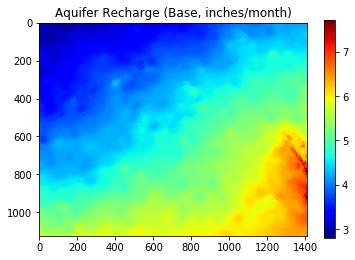

In [10]:
fig, ax = plt.subplots()
plt.imshow(recharge, cmap='jet')
plt.colorbar()
plt.title('Aquifer Recharge (Base, inches/month)')

In [16]:
nrow, ncol = recharge.shape  # 743=rows, 1412=columns
print(nrow)
print(ncol)

1124
1412


#### Number of periods:

In [24]:
nper = 50 # years

#### Period Length - in this case, years

In [25]:
perlen = [365.25] # time in each stress period

#### Model will run as steady state the first year

In [19]:
steady = [True] # stady state the first year

#### Then, it will run as transient for each year after the first

In [26]:
for sp in range(1,nper):
    perlen.append(365.25)
    steady.append(False) 

In [27]:
nstp = 1 # number of time steps in each stress period


In [28]:
delr, delc = 5280, 5280 # area in feet of each row and column


In [29]:
lenuni = 1 # unit length is in feet


In [30]:
top, botm = 100, 0 # top elevation of the model is 100, botm elevation is 0


In [31]:
rech = recharge / 12 / 30.4 # to feet per day

In [32]:
case = ['min','mid','max']
mult = [.75,1,1.25]

finished case min
finished case mid
finished case max


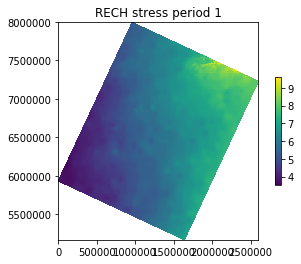

In [33]:
for i in range(len(mult)):
    mf = flopy.modflow.Modflow('trinity_rech_'+case[i]) # this is the main flopy.modflow model object;
    dis = flopy.modflow.ModflowDis(mf,1,nrow,ncol,nper,delr,delc,0,top,botm,perlen,nstp,steady=steady,itmuni=4,
                                   lenuni=lenuni,rotation=65)
    rch = flopy.modflow.ModflowRch(mf,rech=recharge*mult[i])  # is the recharge pckage
    mf.write_input()
    print(f'finished case {case[i]}')
rch.plot(colorbar=True)
plt.show()